In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
# !pip install mysql-connector-python


In [3]:
import mysql.connector




def make_connection_with_db():
    connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="wp_ecommerce")
    cursor = connection.cursor(dictionary=True)
    return connection,cursor 
# cursor.execute("SHOW TABLES")
# for table in cursor:
#     print(table)

# cursor.close()
# connection.close()

In [4]:
def custemer_by_country():
    _,cursor = make_connection_with_db() 
    sel = ''' 
        SELECT c.country ,COUNT(c.customer_id) as num_of_customer
        FROM `wp_wc_customer_lookup` as c 
        GROUP By c.country
    '''
    cursor.execute(sel)
    result =cursor.fetchall() 

    df  = pd.DataFrame(result,columns=['country','num_of_customer'])
    return df 

In [5]:
custemer_by_country()

,country,num_of_customer
0,AE,209
1,BH,218
2,JO,187
3,KW,188
4,SA,179


In [6]:
def show_customer_by_countries_bar():
    df =custemer_by_country() 
    x= df['country']
    y= df['num_of_customer']
    plt.figure(figsize=(10,7))
    colors = [] 
    # Generate a random color for each bar
    colors = []
    for _ in range(len(x)): # Use '_' as the loop variable if 'i' is not used
        colors.append(np.random.rand(3,)) # Generates an array of 3 random floats for RGB
    
    # Plot the bars with the generated colors
    bars = plt.bar(x, y, color=colors) # Corrected parameter name to 'color'
    
    # Add annotations (numbers on top of bars)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 2, # Position the text slightly above the bar
                 round(yval), ha='center', va='bottom', fontsize=9, color='black') # Format text
    plt.title('Number of Customers by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if many countries
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


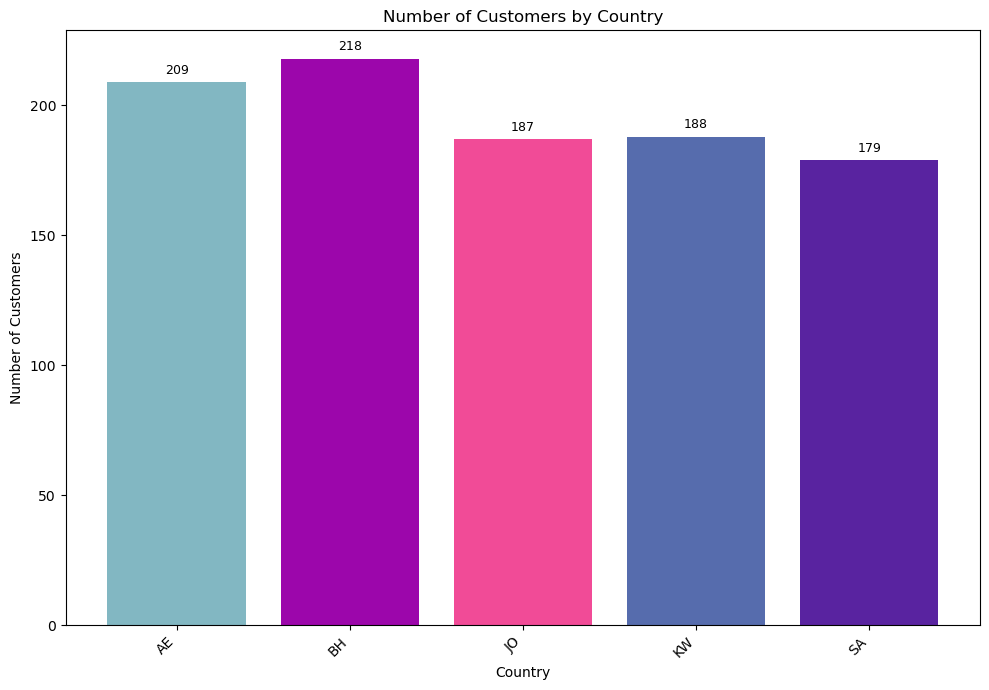

In [7]:
show_customer_by_countries_bar()

In [8]:
def show_customer_by_countries_pie():
        df =custemer_by_country() 
        x= df['country']
        y= df['num_of_customer']
        plt.figure(figsize=(10,7))
        plt.pie(y,labels=x,autopct='%0.1f%%' )   
        plt.show()

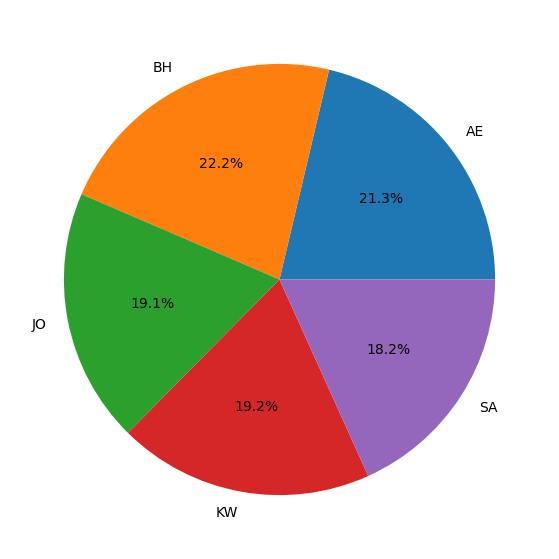

In [9]:
show_customer_by_countries_pie()